<a href="https://colab.research.google.com/github/NitishaJonnada/nitisha_INFO5731_Spring2023/blob/main/in_class_exercise_04_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


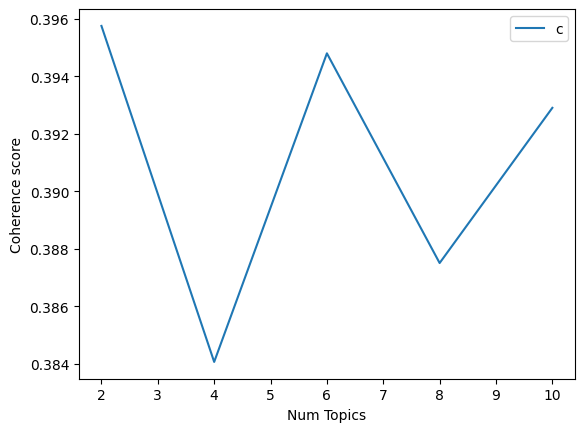

[0.39575998630210485, 0.3840671763161856, 0.39480639380667626, 0.38750848180120306, 0.3929098227771754]
0.39575998630210485
2
[(0, '0.112*"brocolli" + 0.112*"good" + 0.082*"health"'), (1, '0.075*"drive" + 0.053*"brother" + 0.053*"mother"')]


In [ ]:
# Write your code here
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel
nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()   
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
texts = []

for i in doc_s:    
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)  
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)

import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=y, id2word = dictionary, passes=20)

print(ldamodel.print_topics(num_topics=y, num_words=3))

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


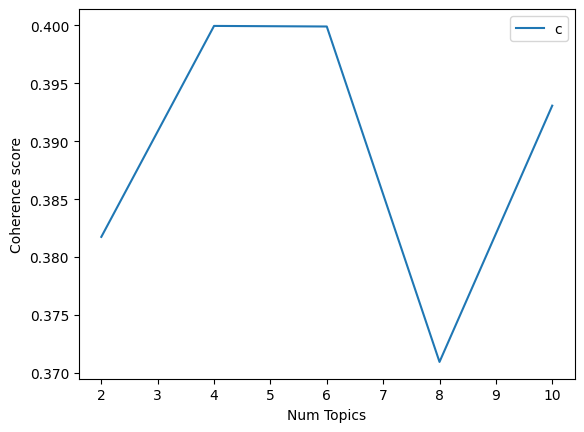

[0.3817422064246544, 0.3999475024231068, 0.39989783076321334, 0.3709517198346399, 0.393066321472166]
0.3999475024231068
4
[(0, '0.424*"brocolli" + 0.424*"good" + 0.350*"eat"'), (1, '0.376*"drive" + -0.349*"brocolli" + -0.349*"good"'), (2, '-0.534*"health" + -0.250*"may" + -0.250*"caus"'), (3, '0.312*"practic" + 0.312*"around" + 0.312*"lot"')]


In [ ]:
# Write your code here
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords

nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()   
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
texts = []
for i in doc_s:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)

import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)


lsamodel = gensim.models.lsimodel.LsiModel(corpus, num_topics=y, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=y, num_words=3))

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

NameError: ignored

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
import nltk; nltk.download('stopwords')
!python3 -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-03 03:43:37.632687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 03:43:39.851911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install pyLDAvis==2.1.2
!pip install gensim==3.8.3
import re
import numpy as np
import pandas as pd
from pprint import pprint


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import spacy


import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
   
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts


def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
  
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()




## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
LSA in topic modeling is one of the foundaitonal techniques. It is a matrix with terms and documents and make it into individual topic term matrix and topic document matrix. 
Latent Dirichlet Allocation is a process of classifying text within a document to a particular topic. 
LDA does not output document similarities like LSA. 
To find the optimal number of topics multiple LDA models with various number of topics are built and the one that gives highest coherence value is selected. 
Number of topics that are considered above are 9,16, 13, 18 
For number of topic=9, coherence value is 0.37, for 16 coherence value is 0.3, for 13, coherence value is 0.323 and for number of topics = 18, coherence value is 0.344 
Here, optimal number of topic is 9 
In the graph for cohrence score and number of topics for LSA, 11 is the optimum number of topic since it has the highest score and the coherence value is 0.32. 

Hence it is observed that LDA gives better results when compared to LSA and overcomes all the drawbacks of LSA. 

SyntaxError: ignored